In [1]:
#Miguel Angel Joven Trujillo
#Analisis de Datos
#Prediccion de la presencia de enfermedad cardiaca
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2


In [5]:
data = pd.read_csv('C:/Users/MIGUEL/Downloads/archive (1)/heart_cleveland_upload.csv')


In [7]:
# Análisis exploratorio de los datos
print(data.head())
print(data.info())
print(data.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

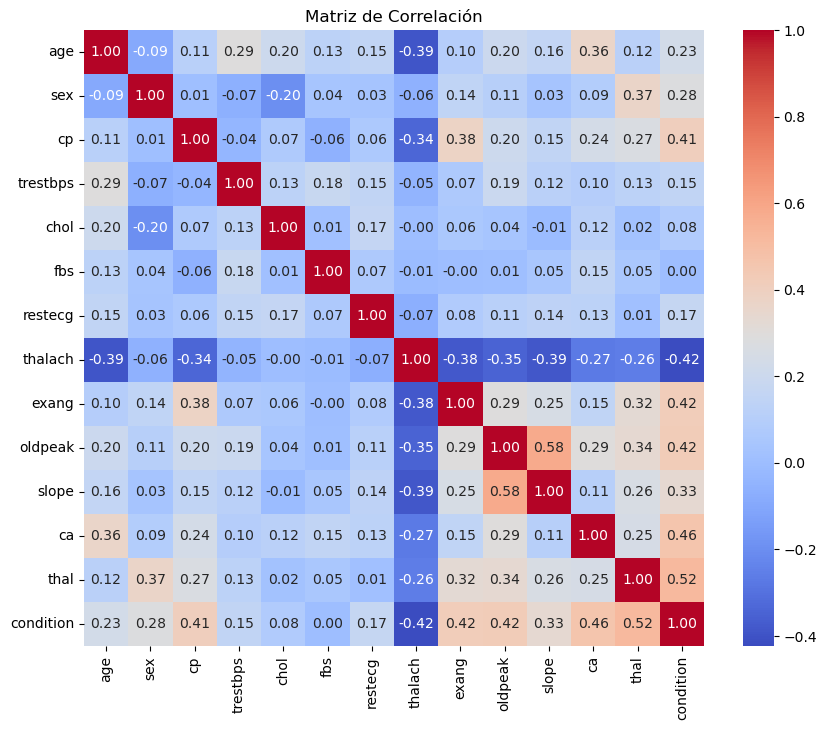

In [9]:
# Visualización de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

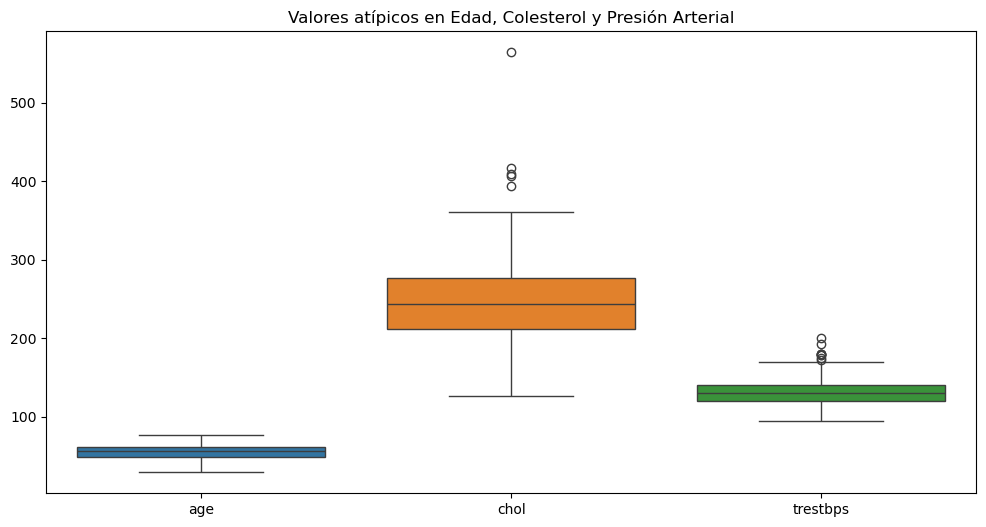

In [11]:
# Identificación de valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['age', 'chol', 'trestbps']])
plt.title('Valores atípicos en Edad, Colesterol y Presión Arterial')
plt.show()

In [13]:
# Preprocesamiento de datos
# Manejo de valores faltantes (si los hay)
data.fillna(data.mean(), inplace=True)

In [15]:
# Codificación de variables categóricas
data['sex'] = data['sex'].map({0: 'Femenino', 1: 'Masculino'})
data['cp'] = data['cp'].map({0: 'Dolor Tipo 1', 1: 'Dolor Tipo 2', 2: 'Dolor Tipo 3', 3: 'Dolor Tipo 4'})
data['thal'] = data['thal'].map({0: 'Normal', 1: 'Defecto fijo', 2: 'Defecto reversible', 3: 'Desconocido'})

In [17]:
# Selección de características
X = data.drop(['condition'], axis=1)  # Variables independientes
y = data['condition']  # Variable objetivo

In [19]:
# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

In [21]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
# Selección de las mejores características
from sklearn.feature_selection import mutual_info_classif, SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [31]:
# Entrenamiento del modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Predicciones
y_pred = model.predict(X_test)

In [35]:
# Evaluación del desempeño del modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.75      0.75      0.75        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

Matriz de Confusión:
[[25  7]
 [ 7 21]]


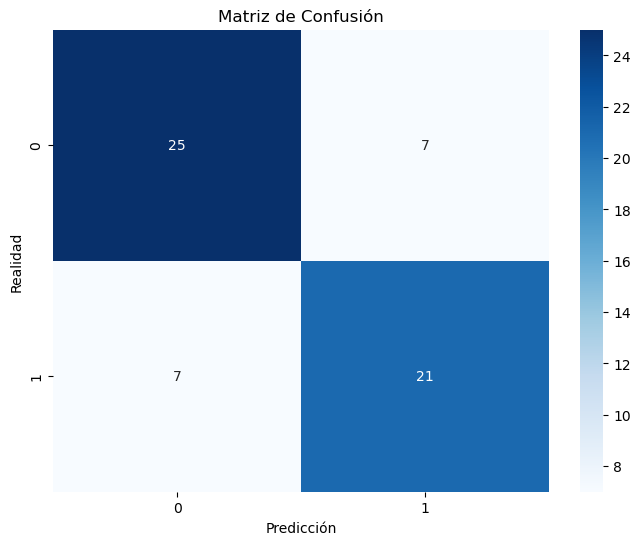

In [37]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

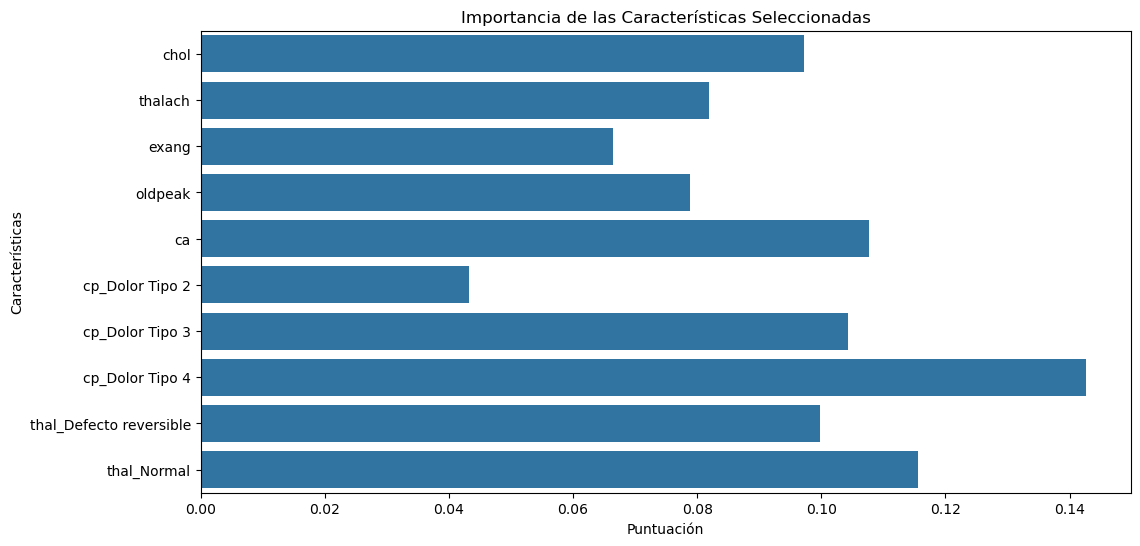

In [39]:
# Visualización de las características seleccionadas
feature_scores = selector.scores_
features = X.columns[selector.get_support()]
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_scores[selector.get_support()], y=features)
plt.title('Importancia de las Características Seleccionadas')
plt.xlabel('Puntuación')
plt.ylabel('Características')
plt.show()